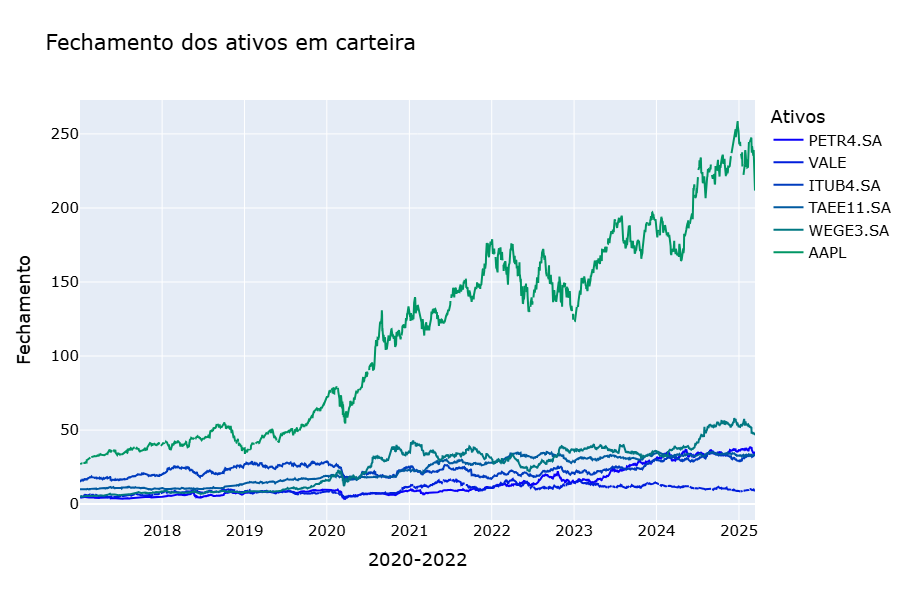

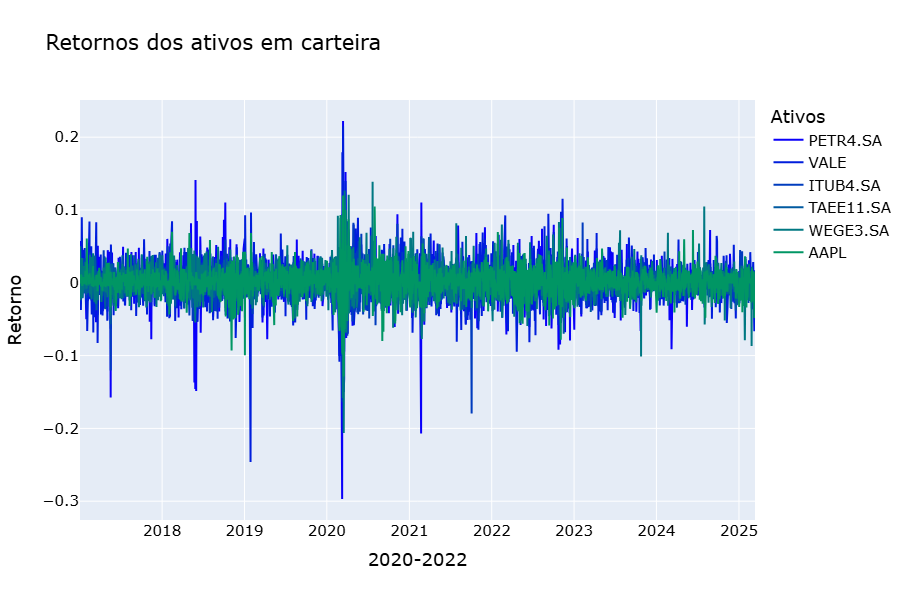

                                                   
Existe 5% de chances do portfolio perder mais de -2.02% em 1 dia
Existe 1% de chances do portfolio perder mais de -3.62% em 1 dia
Existe 5% de chances do portfolio perder mais de -4.52% em 5 dias
Existe 1% de chances do portfolio perder mais de -8.09% em 5 dias


In [5]:
# Carregando as bibliotecas

import pandas as pd
import numpy as np

import yfinance as yf

import yfinance
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import kaleido

# 3 libs novas
import plotly.figure_factory as ff
from scipy.stats import shapiro
from scipy.stats import norm

import warnings

warnings.filterwarnings("ignore")

import os
cwd = os.getcwd()

tickers = ["PETR4.SA", "VALE", "ITUB4.SA"
           , "TAEE11.SA", "WEGE3.SA", "AAPL",'NVDA']

start = "2017-01-02"

df0 = pd.DataFrame()

for ticker in tickers:
    # Baixando os dados
    df1 = yf.download(ticker, start=start, progress = False)['Close']
    #data = df1.xs(ticker, level="Ticker", axis=1)
    # Adicionando a coluna 'Close' para o DataFrame com o nome do ticker
    df0[ticker] = df1

df0.columns[0]

fig = make_subplots(rows = 1, cols = 1
                    , shared_xaxes = True
                    , vertical_spacing = 0.05)

fig.add_trace(go.Scatter(x = df0.index, y = df0.iloc[:,0]
                                , name = df0.columns[0]
                                , line = dict(color = "rgb(10,0,250)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = df0.index, y = df0.iloc[:,1]
                                , name = df0.columns[1]
                                , line = dict(color = "rgb(0,30,220)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = df0.index, y = df0.iloc[:,2]
                                , name = df0.columns[2]
                                , line = dict(color = "rgb(0,60,190)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = df0.index, y = df0.iloc[:,3]
                                , name = df0.columns[3]
                                , line = dict(color = "rgb(0,90,160)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = df0.index, y = df0.iloc[:,4]
                                , name = df0.columns[4]
                                , line = dict(color = "rgb(0,120,130)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = df0.index, y = df0.iloc[:,5]
                                , name = df0.columns[5]
                                , line = dict(color = "rgb(0,150,100)"))
              , row = 1, col = 1)


fig.update_layout(height = 600, width = 800
                  , title_text = "Fechamento dos ativos em carteira"
                  , font_color = "blue"
                  , title_font_color = "black"
                  , xaxis_title = "2020-2022"
                  , yaxis_title = "Fechamento"
                  , showlegend = True
                  , legend_title = "Ativos"
                  , font = dict(size = 15, color = "Black")
                 )

fig.update_layout(hovermode = "x")

fig.show()

retornos = df0.pct_change()
retornos

fig = make_subplots(rows = 1, cols = 1
                    , shared_xaxes = True
                    , vertical_spacing = 0.05)

fig.add_trace(go.Scatter(x = retornos.index, y = retornos.iloc[:,0]
                                , name = retornos.columns[0]
                                , line = dict(color = "rgb(10,0,250)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = retornos.index, y = retornos.iloc[:,1]
                                , name = retornos.columns[1]
                                , line = dict(color = "rgb(0,30,220)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = retornos.index, y = retornos.iloc[:,2]
                                , name = retornos.columns[2]
                                , line = dict(color = "rgb(0,60,190)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = retornos.index, y = retornos.iloc[:,3]
                                , name = retornos.columns[3]
                                , line = dict(color = "rgb(0,90,160)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = retornos.index, y = retornos.iloc[:,4]
                                , name = retornos.columns[4]
                                , line = dict(color = "rgb(0,120,130)"))
              , row = 1, col = 1)

fig.add_trace(go.Scatter(x = retornos.index, y = retornos.iloc[:,5]
                                , name = retornos.columns[5]
                                , line = dict(color = "rgb(0,150,100)"))
              , row = 1, col = 1)


fig.update_layout(height = 600, width = 800
                  , title_text = "Retornos dos ativos em carteira"
                  , font_color = "blue"
                  , title_font_color = "black"
                  , xaxis_title = "2020-2022"
                  , yaxis_title = "Retorno"
                  , showlegend = True
                  , legend_title = "Ativos"
                  , font = dict(size = 15, color = "Black")
                 )

fig.update_layout(hovermode = "x")

fig.show()

# Vamos selecionar uma carteira com pesos aleatórios para cada ativo

pesos = np.random.dirichlet(np.ones(len(tickers)), size = 1)
pesos

retornos_portfolio = retornos.mul(pesos, axis = 1)
retornos_portfolio

retornos["Portfolio"] = retornos_portfolio.sum(axis = 1)
retornos["Portfolio"] = retornos["Portfolio"]*100
retornos.dropna(inplace = True)
retornos
print('                                                   ')
# Calculando o Value at Risk (VaR) per método do percentil
var5 = np.round(np.percentile(retornos["Portfolio"], 5), 2)
print("Existe 5% de chances do portfolio perder mais de " + str(var5) + "% em 1 dia")

var1 = np.round(np.percentile(retornos["Portfolio"], 1), 2)
print("Existe 1% de chances do portfolio perder mais de " + str(var1) + "% em 1 dia")

# Mas e se eu quisesse saber para mais dias?

n = 5 #número de dias

var5_n = np.round(var5*np.sqrt(n), 2)
print("Existe 5% de chances do portfolio perder mais de " + str(var5_n) + "% em " + str(n) + " dias")

var1_n = np.round(var1*np.sqrt(n), 2)
print("Existe 1% de chances do portfolio perder mais de " + str(var1_n) + "% em " + str(n) + " dias")

# # Calculando o VaR pela covariância

# Primeiro de tudo: os retornos deveriam seguir uma distribuição normal....

stat, p = shapiro(retornos.iloc[:,2])

# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.

#https://plotly.com/python/v3/normality-test/
    
alpha = 0.05
if p > alpha:
    msg = 'Amostra Gaussiana (não rejeita H0)'
else:
    msg = 'Amostra não Gaussiana (rejeita H0)'

result_mat = [
    ["Tamanho da amostra", "Teste Estatístico", 'p-value', 'Comentário'],
    [len(retornos.iloc[:,3]), stat, p, msg]
]
swt_table = ff.create_table(result_mat)
swt_table['data'][0].colorscale=[[0, 'blue'],[1, '#ffffff']]
swt_table['layout']['height'] = 100
swt_table['layout']['width'] = 950
swt_table['layout']['margin']['t'] = 10
swt_table['layout']['margin']['b'] = 10
swt_table

swt_table['layout']

cov_retornos = retornos.iloc[:, 0:6].cov()
media_retornos = retornos.iloc[:, 0:6].mean()
